# Drill: Present the same data multiple ways
## Unit 1 Lesson 3 Problem 3

<div style="text-align: right"> Ashley Simpson </div>

In [13]:
# Make code toggle-able for easier review.
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<i>The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a></i>.''')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('nba_2017_players_stats_combined.csv', na_values = ['', 'NULL'])
df.head()

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,OKC,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,HOU,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54
2,2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,...,BOS,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51
3,3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,NO,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31
4,4,5,DeMar DeRozan,SG,27,35.4,9.7,20.9,0.467,0.4,...,TOR,74,35.4,2.21,-2.04,0.17,5.46,15.5,97.69,47


#### Choose one variable and plot that variable four different ways

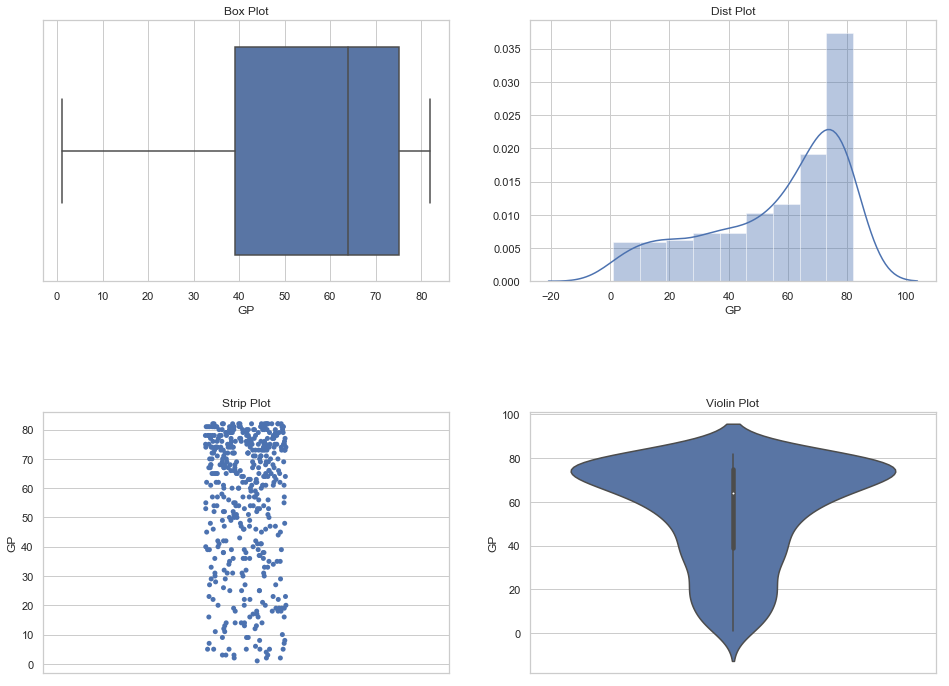

In [4]:
fig = plt.figure(figsize=(16,12))
fig.subplots_adjust(hspace=.5)
sns.set(style="whitegrid")

games = df.loc[:, 'GP']

# Box Plot
g = fig.add_subplot(2,2,1)
ax = sns.boxplot(x=games)
plt.title('Box Plot');

# Dist Plot (Histogram)
g = fig.add_subplot(2,2,2)
ax = sns.distplot(games)
plt.title('Dist Plot');

# Strip Plot
g = fig.add_subplot(2,2,3)
ax = sns.stripplot(games, orient="v")
plt.title('Strip Plot');

# KDE Plot
g = fig.add_subplot(2,2,4)
ax = sns.violinplot(games, orient="v")
plt.title('Violin Plot');

### Pros: 
> **Box:** Easy to see where the majority of the data (as a whole) lies.

> **Hist:** Easily shows the majority of games played (35% almost 80 games).

> **Strip:** Simple, and doesn't take up much space. It's like an organized scatter plot for one variable.

> **Violin:** Easier to see multiple distributions of data at once. Majority of player play just under 80 games.

### Cons: 
> **Box:** Shows less than a violin plot, like majority of games played. Better when paired with a strip plot.

> **Hist:** It doesn't show exact data points.

> **Strip:** The points overlap making it difficult to read. This worsens with larger data sets. Better paired with a box plot.

> **Violin:** Instead of being straightforward like a box plot, you have to tweak parameters.

### Choose two continuous variables, and plot them three different ways.

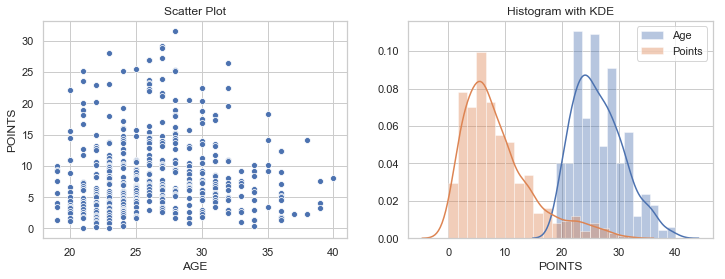

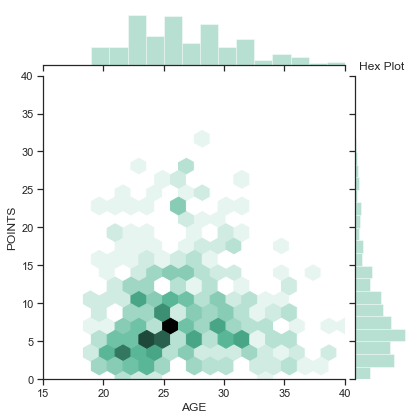

In [8]:
points = df.loc[:, 'POINTS']
age = df.loc[:, 'AGE']


fig = plt.figure(figsize=(12,4))
fig.subplots_adjust(hspace=.5)
sns.set(style="whitegrid")

# Scatter Plot
g = fig.add_subplot(1,2,1)
ax = sns.scatterplot(x=age, y=points,)
plt.title('Scatter Plot');

# Histogram
g = fig.add_subplot(1,2,2)
ax = sns.distplot(age, label='Age')
ax = sns.distplot(points, label='Points')
plt.legend()
plt.title('Histogram with KDE');

# Hex Plot
sns.set(style="ticks")
ax = sns.jointplot(x=age, y=points, kind="hex", color="#4CB391", xlim=(15,40), ylim=(0,40))
plt.title('Hex Plot');

#### Scatter: 
> **Pros:** Easy to see the spread of ages, and how players score by age.

> **Cons:** The congestion makes it difficult to see individual data points.

#### Histogram: 
> **Pros:** Easy to see players ages and how they score, and if those plot follow similar curves.

> **Cons:** Difficult to see the correlation between the two variables.

#### Hex (Joint) Plot: 
> **Pros:** The density make it easier to see the spread of data points compared to a scatter plot.

> **Cons:** Hard to see outliers because they fade into the background.

### Choose one continuous variable and one categorical variable, and plot them six different ways.

Text(0.5, 1.0, 'Violin Plot')

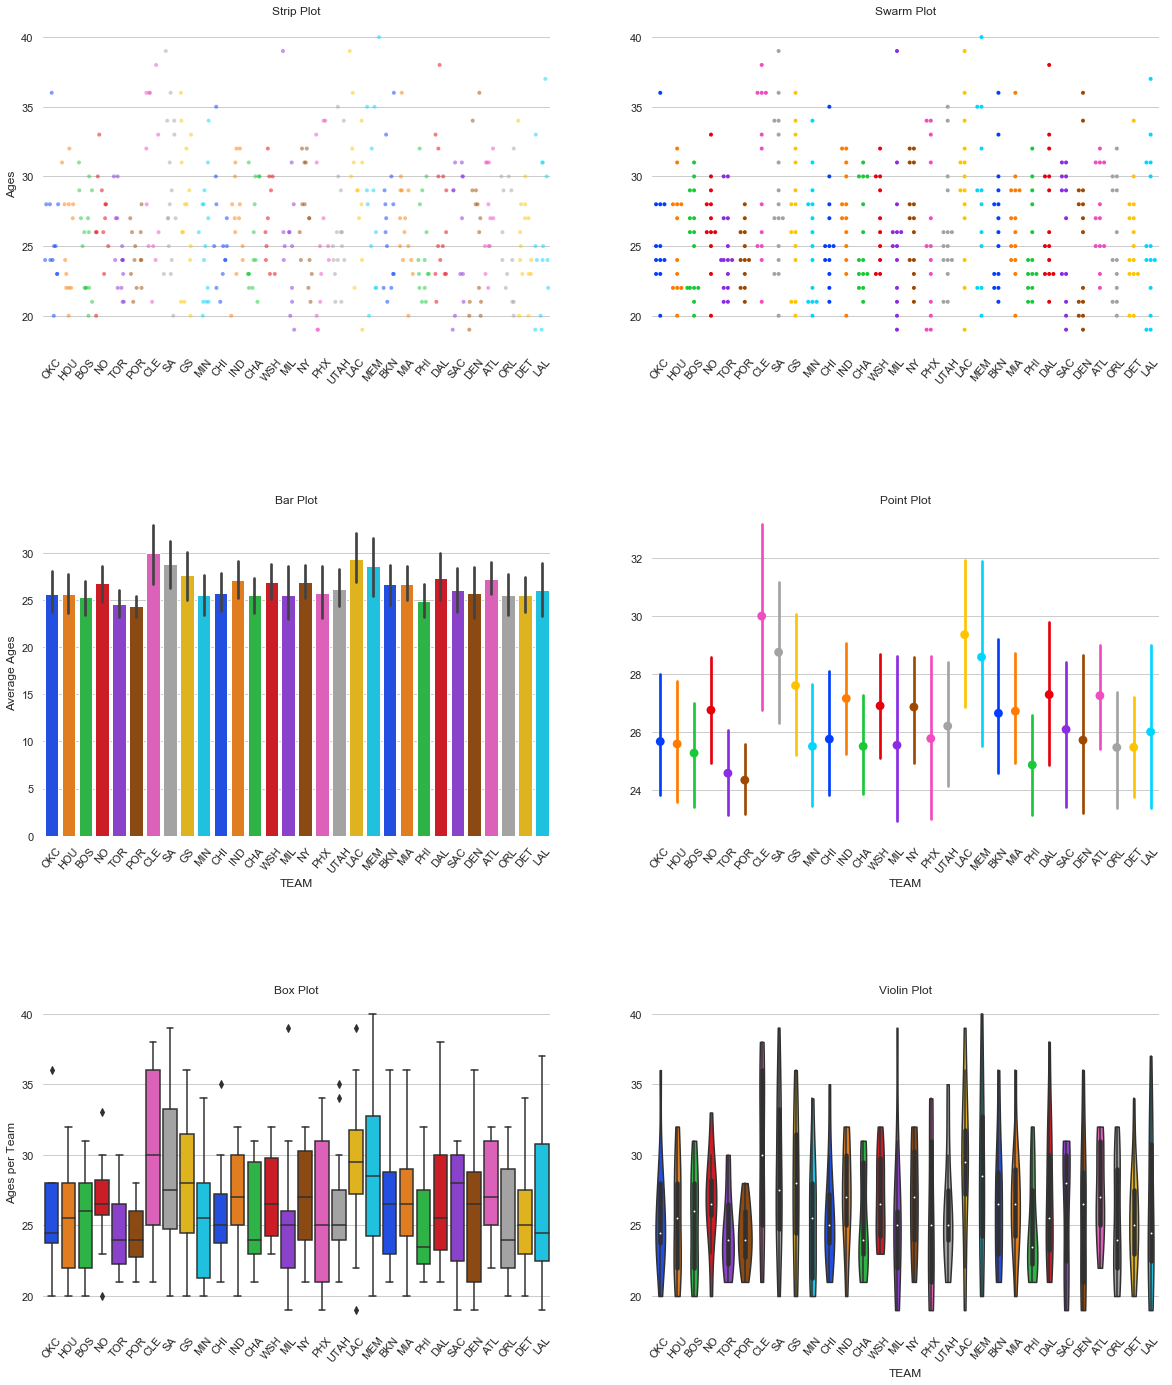

In [12]:
# use age and team
teamAll = df.loc[:, 'TEAM']
teamUni = df[~teamAll.str.contains('/')]
team = teamUni.loc[:, 'TEAM']


fig = plt.figure(figsize=(20,24))
fig.subplots_adjust(hspace=.5)
#sns.set(style="whitegrid")

# Strip plot
g = fig.add_subplot(3,2,1)
ax = sns.stripplot(x=team, 
              y=age, 
              jitter='.4',
              alpha=0.5,
              size=4,
              data=df,
              palette='bright')

g.set(xlabel='', ylabel='Ages')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50)

plt.title('Strip Plot')


# Swarm plot
g = fig.add_subplot(3,2,2)
ax = sns.swarmplot(x=team, 
              y=age, 
              size=4,
              data=df,
              palette='bright')

g.set(xlabel='', ylabel='')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50)

plt.title('Swarm Plot')


# Standardize the y-axis for bar and point plots
yticks = [0.0,0.25,0.5,0.75,1,1.25,1.5,1.75]


# Bar plot
g = fig.add_subplot(3,2,3)
ax = sns.barplot(x=team, 
               y=age, 
               data=df, 
               ci=95,
               palette='bright')

#plt.yticks(yticks)
g.set(ylabel='Average Ages')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50)

plt.title('Bar Plot')


# Point plot
g = fig.add_subplot(3,2,4)
ax = sns.pointplot(x=team, 
               y=age,
               data=df, 
               kind='point',
               palette='bright',
               ci=95, 
               dodge=True,
               join=False, 
               xlim=(15,40))

g.set(ylabel='')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50)

plt.title('Point Plot')


#Box Plot
g = fig.add_subplot(3,2,5)
ax = sns.boxplot(x=team, 
               y=age,
               data=df,
               palette='bright')
sns.despine(trim=True, left=True, bottom=True)

g.set(xlabel='', ylabel='Ages per Team')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50)

plt.title('Box Plot')


# Violin Plot
g = fig.add_subplot(3,2,6)
ax = sns.violinplot(x=team, 
               y=age,
               data=df,
               palette='bright',
               cut=0)
sns.despine(trim=True, left=True, bottom=True)

g.set(ylabel='')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50)

plt.title('Violin Plot')

#### Strip Plot: 
> **Pros:** Easy to see the exact data point for each category (team).

> **Cons:** When teams have a lot of players of the same age, they point overlap making it difficult to see precisely how many.

#### Swarm Plot: 
> **Pros:** Better aligns the data points than a strip plot.

> **Cons:** Same as a strip plot with larger data set. The point start to overlap making it difficult to read.

#### Bar Plot: 
> **Pros:** Good for showing the average ages for each category (team), even with many categories.

> **Cons:** You don't see exact data points (ages), and it doesn't show true outliers for older players.

#### Point Plot: 
> **Pros:** Great representation of average ages and as well as the overall spread (minus outliers).

> **Cons:** Cuts of outliers going in both directions, which can easily be misleading if not presented properly.

#### Box Plot: 
> **Pros:** Shows the true spread of the player ages for each team.

> **Cons:** Can't see if the ages are evenly spread out within teams, or if they cluster.

#### Violin Plot: 
> **Pros:** The density make it easier to see the spread of data points compared to a box plot.

> **Cons:** Because there are many categories, it's difficult to get a true sense of each violin and where the density lies for some teams.